In [1]:

from __future__ import division

import numpy as np
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

__author__ = 'Albert Kottke'

class AbrahamsonSilvaKamai2014:
    
    """The Abrahamson, Silva, and Kamai (2014) :cite:`abrahamson14` ground
    motion model for active tectonic regions.
    """
    
    NAME = 'Abrahamson, Silva, & Kamai (2014)'
    ABBREV = 'ASK14'
    
    def __init__(self):
    # Reference velocity (m/sec)
        self.V_REF = 1180.
    
        self.period = np.array([0.01, 0.02, 0.03, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 6, 7.5, 10, 0, -1])
        self.v_lin =np.array([660.0000, 680.0000, 770.0000, 915.0000, 960.0000, 910.0000, 740.0000, 590.0000, 495.0000, 430.0000, 360.0000, 340.0000, 330.0000, 330.0000, 330.0000, 330.0000, 330.0000, 330.0000, 330.0000, 330.0000, 330.0000, 330.0000, 660.0000, 330.0000])
        self.b =np.array([-1.4700, -1.4590, -1.3900, -1.2190, -1.1520, -1.2300, -1.5870, -2.0120, -2.4110, -2.7570, -3.2780, -3.5990, -3.8000, -3.5000, -2.4000, -1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, -1.4700, -2.0200])
        self.n =np.array([1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000])
        self.m1 =np.array([6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.7500, 6.8200, 6.9200, 7.0000, 7.0600, 7.1450, 7.2500, 6.7500, 6.7500]);
        self.m2 =np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]);
        
        self.c =np.array([2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2.4000, 2400.0000])
        self.c4 =np.array([4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000, 4.5000])

        self.a1 =np.array([0.5870, 0.5980, 0.6020, 0.7070, 0.9730, 1.1690, 1.4420, 1.6370, 1.7010, 1.7120, 1.6620, 1.5710, 1.2990, 1.0430, 0.6650, 0.3290, -0.0600, -0.2990, -0.5620, -0.8750, -1.3030, -1.9280, 0.5870, 5.9750])
        self.a2 =np.array([-0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7900, -0.7650, -0.7110, -0.6340, -0.5290, -0.7900, -0.9190])
        self.a3 =np.array([0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750, 0.2750])
        self.a4 =np.array([-0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000])
        self.a5 =np.array([-0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100, -0.4100])
        self.a6 =np.array([2.1541, 2.1461, 2.1566, 2.0845, 2.0285, 2.0408, 2.1208, 2.2241, 2.3124, 2.3383, 2.4688, 2.5586, 2.6821, 2.7630, 2.8355, 2.8973, 2.9061, 2.8888, 2.8984, 2.8955, 2.8700, 2.8431, 2.1541, 2.3657])
        self.a7 =np.array([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
        self.a8 =np.array([-0.0150, -0.0150, -0.0150, -0.0150, -0.0150, -0.0150, -0.0220, -0.0300, -0.0380, -0.0450, -0.0550, -0.0650, -0.0950, -0.1100, -0.1240, -0.1380, -0.1720, -0.1970, -0.2180, -0.2350, -0.2550, -0.2850, -0.0150, -0.0940])
        self.a10 =np.array([1.7350, 1.7180, 1.6150, 1.3580, 1.2580, 1.3100, 1.6600, 2.2200, 2.7700, 3.2500, 3.9900, 4.4500, 4.7500, 4.3000, 2.6000, 0.5500, -0.9500, -0.9500, -0.9300, -0.9100, -0.8700, -0.8000, 1.7350, 2.3600])
        self.a11 =np.array([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
        self.a12 =np.array([-0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.2000, -0.2000, -0.2000, -0.1000, -0.1000])
        self.a13 =np.array([0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.5800, 0.5600, 0.5300, 0.5000, 0.4200, 0.3500, 0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 0.2500])
        self.a14 =np.array([-0.3000, -0.3000, -0.3000, -0.3000, -0.3000, -0.3000, -0.3000, -0.3000, -0.2400, -0.1900, -0.1100, -0.0400, 0.0700, 0.1500, 0.2700, 0.3500, 0.4600, 0.5400, 0.6100, 0.6500, 0.7200, 0.8000, -0.3000, 0.2200])
        self.a15 =np.array([1.1000, 1.1000, 1.1000, 1.1000, 1.1000, 1.1000, 1.1000, 1.1000, 1.1000, 1.0300, 0.9200, 0.8400, 0.6800, 0.5700, 0.4200, 0.3100, 0.1600, 0.0500, -0.0400, -0.1100, -0.1900, -0.3000, 1.1000, 0.3000])
        self.a17 =np.array([-0.0072, -0.0073, -0.0075, -0.0080, -0.0089, -0.0095, -0.0095, -0.0086, -0.0074, -0.0064, -0.0043, -0.0032, -0.0025, -0.0025, -0.0022, -0.0019, -0.0015, -0.0010, -0.0010, -0.0010, -0.0010, -0.0010, -0.0072, -0.0005])

        self.a43 =np.array([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1400, 0.1700, 0.2200, 0.2600, 0.3400, 0.4100, 0.5100, 0.5500, 0.4900, 0.4200, 0.1000, 0.2800])
        self.a44 =np.array([0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0700, 0.1000, 0.1400, 0.1700, 0.2100, 0.2500, 0.3000, 0.3200, 0.3200, 0.3200, 0.2750, 0.2200, 0.0500, 0.1500])
        self.a45 =np.array([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0300, 0.0600, 0.1000, 0.1400, 0.1700, 0.2000, 0.2200, 0.2300, 0.2300, 0.2200, 0.2000, 0.1700, 0.1400, 0.0000, 0.0900])
        self.a46 =np.array([-0.0500, -0.0500, -0.0500, -0.0500, -0.0500, -0.0500, -0.0500, -0.0300, 0.0000, 0.0300, 0.0600, 0.0900, 0.1300, 0.1400, 0.1600, 0.1600, 0.1600, 0.1400, 0.1300, 0.1000, 0.0900, 0.0800, -0.0500, 0.0700])
        self.a25 =np.array([-0.0015, -0.0015, -0.0016, -0.0020, -0.0027, -0.0033, -0.0035, -0.0033, -0.0029, -0.0027, -0.0023, -0.0020, -0.0010, -0.0005, -0.0004, -0.0002, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, -0.0015, -0.0001])
        self.a28 =np.array([0.0025, 0.0024, 0.0023, 0.0027, 0.0032, 0.0036, 0.0033, 0.0027, 0.0024, 0.0020, 0.0010, 0.0008, 0.0007, 0.0007, 0.0006, 0.0003, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0025, 0.0005])
        
        self.a29 =np.array([-0.0034, -0.0033, -0.0034, -0.0033, -0.0029, -0.0025, -0.0025, -0.0031, -0.0036, -0.0039, -0.0048, -0.0050, -0.0041, -0.0032, -0.0020, -0.0017, -0.0020, -0.0020, -0.0020, -0.0020, -0.0020, -0.0020, -0.0034, -0.0037])
        self.a31 =np.array([-0.1503, -0.1479, -0.1447, -0.1326, -0.1353, -0.1128, 0.0383, 0.0775, 0.0741, 0.2548, 0.2136, 0.1542, 0.0787, 0.0476, -0.0163, -0.1203, -0.2719, -0.2958, -0.2718, -0.2517, -0.1400, -0.0216, -0.1503, -0.1462])
        self.a36 =np.array([0.2650, 0.2550, 0.2490, 0.2020, 0.1260, 0.0220, -0.1360, -0.0780, 0.0370, -0.0910, 0.1290, 0.3100, 0.5050, 0.3580, 0.1310, 0.1230, 0.1090, 0.1350, 0.1890, 0.2150, 0.1500, 0.0920, 0.2650, 0.3770])
        self.a37 =np.array([0.3370, 0.3280, 0.3200, 0.2890, 0.2750, 0.2560, 0.1620, 0.2240, 0.2480, 0.2030, 0.2320, 0.2520, 0.2080, 0.2080, 0.1080, 0.0680, -0.0230, 0.0280, 0.0310, 0.0240, -0.0700, -0.1590, 0.3370, 0.2120])
        self.a38 =np.array([0.1880, 0.1840, 0.1800, 0.1670, 0.1730, 0.1890, 0.1080, 0.1150, 0.1220, 0.0960, 0.1230, 0.1340, 0.1290, 0.1520, 0.1180, 0.1190, 0.0930, 0.0840, 0.0580, 0.0650, 0.0000, -0.0500, 0.1880, 0.1570])
        self.a39 =np.array([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
        self.a40 =np.array([0.0880, 0.0880, 0.0930, 0.1330, 0.1860, 0.1600, 0.0680, 0.0480, 0.0550, 0.0730, 0.1430, 0.1600, 0.1580, 0.1450, 0.1310, 0.0830, 0.0700, 0.1010, 0.0950, 0.1330, 0.1510, 0.1240, 0.0880, 0.0950])
        self.a41 =np.array([-0.1960, -0.1940, -0.1750, -0.0900, 0.0900, 0.0060, -0.1560, -0.2740, -0.2480, -0.2030, -0.1540, -0.1590, -0.1410, -0.1440, -0.1260, -0.0750, -0.0210, 0.0720, 0.2050, 0.2850, 0.3290, 0.3010, -0.1960, -0.0380])
        self.a42 =np.array([0.0440, 0.0610, 0.1620, 0.4510, 0.5060, 0.3350, -0.0840, -0.1780, -0.1870, -0.1590, -0.0230, -0.0290, 0.0610, 0.0620, 0.0370, -0.1430, -0.0280, -0.0970, 0.0150, 0.1040, 0.2990, 0.2430, 0.0440, 0.0650])
        self.s1 =np.array([0.7540, 0.7600, 0.7810, 0.8100, 0.8100, 0.8100, 0.8010, 0.7890, 0.7700, 0.7400, 0.6990, 0.6760, 0.6310, 0.6090, 0.5780, 0.5550, 0.5480, 0.5270, 0.5050, 0.4770, 0.4570, 0.4290, 0.7540, 0.6620])
        self.s2 =np.array([0.5200, 0.5200, 0.5200, 0.5300, 0.5400, 0.5500, 0.5600, 0.5650, 0.5700, 0.5800, 0.5900, 0.6000, 0.6150, 0.6300, 0.6400, 0.6500, 0.6400, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.5200, 0.5100])
        self.s3 =np.array([0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.4700, 0.3800])
        self.s4 =np.array([0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3600, 0.3800])
        
        self.s1m =np.array([0.7410, 0.7470, 0.7690, 0.7980, 0.7980, 0.7950, 0.7730, 0.7530, 0.7290, 0.6930, 0.6440, 0.6160, 0.5660, 0.5410, 0.5060, 0.4800, 0.4720, 0.4470, 0.4250, 0.3950, 0.3780, 0.3590, 0.7410, 0.6600])
        self.s2m =np.array([0.5010, 0.5010, 0.5010, 0.5120, 0.5220, 0.5270, 0.5190, 0.5140, 0.5130, 0.5190, 0.5240, 0.5320, 0.5480, 0.5650, 0.5760, 0.5870, 0.5760, 0.5650, 0.5680, 0.5710, 0.5750, 0.5850, 0.5010, 0.5100])
        self.s5_JP =np.array([0.5400, 0.5400, 0.5500, 0.5600, 0.5700, 0.5700, 0.5800, 0.5900, 0.6100, 0.6300, 0.6600, 0.6900, 0.7300, 0.7700, 0.8000, 0.8000, 0.8000, 0.7600, 0.7200, 0.7000, 0.6700, 0.6400, 0.5400, 0.5800])
        self.s6_JP =np.array([0.6300, 0.6300, 0.6300, 0.6500, 0.6900, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.6900, 0.6800, 0.6600, 0.6200, 0.5500, 0.5200, 0.5000, 0.5000, 0.5000, 0.5000, 0.6300, 0.5300])

    

    def _calc_ln_resp(self, mag, rrup, r_jb, r_x, r_y0, r_crjb, w, dip, ztor, v_s30, z1, mech, fhw, fAS, FVS30, region):
        """Calculate the natural logarithm of the response.

        Args:
            v_s30 (float): site condition. Set `v_s30` to the reference
                velocity (e.g., 1180 m/s) for the reference response.

            resp_ref (Optional[:class:`np.array`]): response at the reference
                condition. Required if `v_s30` is not equal to reference
                velocity.
        fAS = 1 for aftershock
        region = 0,1 for global or ca
        region = 2 for china
        region = 3 for japan
        region = 4 for taiwan
        Returns:
            :class:`np.array`: Natural log of the response.
        """
        if r_crjb == 999:
            r_crjb = 15 # default

        # fault width    
        if w == 999:
            w = min(
            18 / np.sin(np.radians(dip)),
            10 ** (-1.75 + 0.45 * mag))
          
        
        
        # Magnitude scaling
        f1 = self._calc_f1(mag, rrup)

        if fhw == 1:
            # Hanging-wall term
            f4 = self._calc_f4(mag, r_jb, r_x, r_y0, ztor, w, dip)
        else:
            f4 = 0

        # Depth to top of rupture term
        f6 = self.a15 * np.clip(ztor / 20, 0, 1)
        
        # Style of faulting
        if mech == 'RS':
            f7 = self.a11 * np.clip(mag - 4, 0, 1)
            f8 = 0
        elif mech == 'NS':
            f7 = 0
            f8 = self.a12 * np.clip(mag - 4, 0, 1)
        else:
            f7, f8 = 0, 0

        
        # Site term
        ###########
        v_1 = np.exp(-0.35 * np.log(np.clip(self.period, 0.5, 3) / 0.5) +
                     np.log(1500))
        vs_ratio = np.minimum(v_s30, v_1) / self.v_lin
        # Linear site model
        f5 = (self.a10 + self.b * self.n) * np.log(vs_ratio)
        
        sa_1180 = np.exp(f1 + f4 + f6 + f7 + f8 + f5)
        
        # Nonlinear model
        mask = vs_ratio < 1
        f5[mask] = (
            self.a10 * np.log(vs_ratio) -
            self.b * np.log(sa_1180 + self.c) +
            self.b * np.log(sa_1180 + self.c * vs_ratio ** self.n)
        )[mask]

        
        # Basin term
        if v_s30 == self.V_REF or z1 == 999:
            # No basin response
            f10 = 0
        else:
            # Ratio between site depth_1_0 and model center
            ln_depth_ratio = np.log(
                (z1 + 0.01) /
                (self.calc_depth_1_0(v_s30) + 0.01)
            )
            slope = interp1d(
                [150, 250, 400, 700],
                np.c_[self.a43, self.a44, self.a45, self.a46],
                copy=False,
                bounds_error=False,
                fill_value=(self.a43, self.a46),
            )(v_s30)
            f10 = slope * ln_depth_ratio

        # Aftershock term
        if fAS == 1:
            f11 = self.a14 * np.clip(1 - (r_crjb - 5) / 10, 0, 1)
        else:
            f11 = 0

        if region == 4: # taiwan
            freg = self.a31 * np.log(vs_ratio) + self.a25 * rrup
        elif region == 2: # china
            freg = self.a28 * rrup
        elif region == 3:
            f13 = interp1d(
                [150, 250, 350, 450, 600, 850, 1150],
                np.c_[self.a36, self.a37, self.a38, self.a39, self.a40, self.a41, self.a42],
                copy=False,
                bounds_error=False,
                fill_value=(self.a36, self.a42),
            )(v_s30)
            freg = f13 + self.a29 * rrup
        else:
            freg = 0
            psa = np.exp(f1 + f4 + f5 + f6 + f7 + f8 + f10 + f11 + freg)
            
        sigma = self._calc_ln_std(mag, rrup, v_s30, sa_1180, FVS30, region)
        
        return psa, sigma, self.period
    
    
    def _calc_ln_std(self, mag, rrup, v_s30, psa_ref, FVS30, region):
        """Calculate the logarithmic standard deviation.

        Returns:
            :class:`np.array`: Logarithmic standard deviation.
        """

        if region == 3:
            phi_al = self.s5 + (self.s6 - self.s5) * np.clip((rrup - 30) / 50,
                                                    0, 1)
        else:
            transition = np.clip((mag - 4) / 2, 0, 1)
            if FVS30 == 1:
                phi_al = self.s1m + (self.s2m - self.s1m) * transition
            else:
                phi_al = self.s1m + (self.s2m - self.s1m) * transition

        tau_al = self.s3 + (self.s4 - self.s3) * np.clip((mag - 5) / 2, 0, 1)
        tau_b = tau_al

        # Remove period independent site amplification uncertainty of 0.4
        phi_amp = 0.4
        phi_b = np.sqrt(phi_al ** 2 - phi_amp ** 2)

        # The partial derivative of the amplification with respect to
        # the reference intensity
        deriv = ((-self.b * psa_ref) / (psa_ref + self.c) +
                 (self.b * psa_ref) /
                 (psa_ref + self.c * (v_s30 / self.v_lin) ** self.n))
        deriv[v_s30 >= self.v_lin] = 0

        tau = tau_b * (1 + deriv)
        phi = np.sqrt(phi_b ** 2 * (1 + deriv) ** 2 + phi_amp ** 2)

        ln_std = np.sqrt(phi ** 2 + tau ** 2)

        return ln_std
    
    
    def calc_ln_respF(self, period, mag, rrup, r_jb, r_x, r_y0, r_crjb, w, dip, ztor, v_s30, z1, mech, fhw, fAS, FVS30, region):
        
        #convert periods to numpy array
        period = np.array([period]).flatten()
        
        #period tolerance
        p_tol = 1e-4
        #compute conditional psa for all periods
        y_all, sig_all, per_all = self._calc_ln_resp(mag, rrup, r_jb, r_x, r_y0, r_crjb, w, dip, ztor, v_s30, z1, mech, fhw, fAS, FVS30, region)
        
        # return pga & pgv
        pga = y_all[-2]
        pgv = y_all[-1]
        
        y_all_ = y_all[0:-2]
        sig_all_ = sig_all[0:-2]
        per_all_ = per_all[0:-2]

        #find eas for frequency of interest
        if np.all([np.isclose(p, per_all_, p_tol).any() for p in period]):
            i_p   = np.array([np.where(np.isclose(p, per_all_, p_tol))[0] for p in period]).flatten()
            psa   = y_all_[i_p]
            sigma = sig_all_[i_p]
        else:
            psa   = np.exp(np.interp(np.log(np.abs(period)), np.log(per_all_), np.log(y_all_), left=-np.nan, right=-np.nan)) 
            sigma =        np.interp(np.log(np.abs(period)), np.log(per_all_), sig_all_,       left=-np.nan, right=-np.nan)

        return psa, sigma, pga, pgv

    
    def _calc_f1(self, mag, rrup):
        """Calculate the magnitude scaling parameter f1.

        Returns:
            :class:`np.array`: Model parameter f1.
        """

        # Magnitude dependent taper
        dist = np.sqrt(
            rrup ** 2 +
            (self.c4 - (self.c4 - 1) * np.clip(5 - mag, 0, 1)) ** 2)

        # Need to copy self.a1 to that it isn't modified during the following
        # operations.
        f1 = np.array(self.a1)
        ma1 = (mag <= self.m2)
        f1[ma1] += (
            self.a4 * (self.m2 - self.m1) + self.a8 * (8.5 - self.m2) ** 2 +
            self.a6 * (mag - self.m2) +
            self.a7 * (mag - self.m2) +
            (self.a2 + self.a3 * (mag - self.m1)) * np.log(dist) +
            self.a17 * rrup
        )[ma1]

        f1[~ma1] += (
            self.a8 * (8.5 - mag) ** 2 +
            (self.a2 + self.a3 * (mag - self.m1)) * np.log(dist) +
            self.a17 * rrup
        )[~ma1]

        ma2 = np.logical_and(~ma1, mag <= self.m1)
        f1[ma2] += (self.a4 * (mag - self.m1))[ma2]

        ma3 = np.logical_and(~ma1, mag > self.m1)
        f1[ma3] += (self.a5 * (mag - self.m1))[ma3]

        return f1
    
    
    
    def _calc_f4(self, mag, r_jb, r_x, r_y0, ztor, w, dip):
        """Calculate the hanging-wall parameter f4.

        Returns:
            :class:`np.array`: Model parameter f4.
        """
        # Move this into a decorator?
        
        t1 = min(90 - dip, 60) / 45
        # Constant from page 1041
        a2hw = 0.2
        if mag <= 5.5:
            t2 = 0
        elif mag < 6.5:
            t2 = (1 + a2hw * (mag - 6.5) -
                  (1 - a2hw) * (mag - 6.5) ** 2)
        else:
            t2 = 1 + a2hw * (mag - 6.5)

        # Constants defined on page 1040
        r1 = w * np.cos(np.radians(dip))
        r2 = 3 * r1
        h1 = 0.25
        h2 = 1.5
        h3 = -0.75
        if r_x < r1:
            t3 = h1 + h2 * (r_x / r1) + h3 * (r_x / r1) ** 2
        elif r_x < r2:
            t3 = 1 - ((r_x - r1) / (r2 - r1))
        else:
            t3 = 0

        t4 = np.clip(1 - ztor ** 2 / 100, 0, 1)

        if r_y0 is None:
            t5 = np.clip(1 - r_jb / 30, 0, 1)
        else:
            dist_y1 = r_x * np.tan(np.radians(20))
            t5 = np.clip(1 - (r_y0 - dist_y1) / 5, 0, 1)

        f4 = self.a13 * t1 * t2 * t3 * t4 * t5

        return f4
    
    
    def calc_depth_1_0(self, v_s30, region=0):
        """Estimate the depth to 1 km/sec horizon (:math:`Z_{1.0}`) based on
        :math:`V_{s30}` and region.

        This is based on equations 18 and 19 in the :cite:`abrahamson14`
        and differs from the equations in the :cite:`chiou14`.

        Args:
            v_s30 (float): time-averaged shear-wave velocity over the top 30 m
                of the site (:math:`V_{s30}`, m/s).

        Keyword Args:
            region (Optional[str]): region of basin model. Valid options:
                "california", "japan". If *None*, then "california" is used as
                the default value.

        Returns:
            float: depth to a shear-wave velocity of 1,000 m/sec
                (:math:`Z_{1.0}`, km).

        """
        if region == 3:
            # Japan
            power = 2
            v_ref = 412
            slope = -5.23 / power
        else:
            # Global
            power = 4
            v_ref = 610
            slope = -7.67 / power

        return np.exp(slope * np.log((v_s30 ** power + v_ref ** power) /
                                     (1360. ** power + v_ref ** power))) / 1000
    

In [3]:
gmm = AbrahamsonSilvaKamai2014()
periods = np.array([ 0.01,    0.02,    0.03,    0.04,    0.05,    0.075,   0.1, 0.12,     0.15,  0.17,     0.2, 
                    0.25,    0.3,     0.4,     0.5,     0.75,    1.0,     1.5,     2.0,     3.0,     4.0,     5.0,     7.5,     10.0])

ask = gmm.calc_ln_respF(periods, 7, 10, 0, 0, 0, 999, 999, 90, 15, 760, 999, 'SS', 0, 0, 0, 0)
psa = ask[0]

# T = np.array([0, 1]);
# [np.isin(periods,T)]
# len(psa)


In [4]:
print(gmm._calc_f1(6, 10))

[-1.88955601 -1.87955601 -1.87755601 -1.77755601 -1.52055601 -1.33055601
 -1.10130601 -0.94730601 -0.92130601 -0.94405601 -1.03555601 -1.17805601
 -1.63055601 -1.98030601 -2.44280601 -2.86330601 -3.49990564 -3.94601227
 -4.32507791 -4.64852342 -5.064603   -5.68429988 -1.88955601  2.76276654]


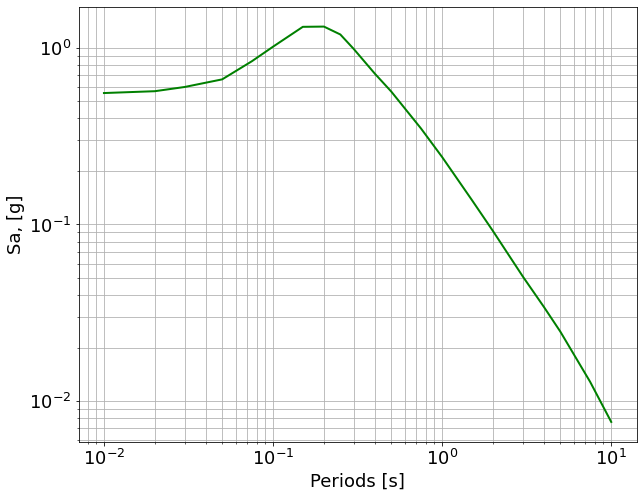

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.loglog(periods, psa, 'g-',linewidth=2, label = 'ask14')
ax.set_xlabel('Periods [s]', fontsize=18)
ax.set_ylabel('Sa, [g]', fontsize=18)
ax.grid(which='both')

ax.tick_params(axis='y',labelsize = 18)
ax.tick_params(axis='x',labelsize = 18)
# plt.ylim((-1e-4,1))

In [164]:
[0.5, 2]

[0.5, 2]